# Importing library and checking dataset

In [17]:
# ID-2017KUCP1043
#HARSH SONI

import matplotlib.pyplot as plt 
%matplotlib inline
import random

import numpy as np 
import pandas as pd 

import os
import re
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
train=pd.read_csv('/content/gdrive/My Drive/pattern/assignment1/train.csv')

In [4]:
print(train.shape)
train


(99999, 16)


,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07 00:00,DE6 1BL,S,N,F,1A,Unnamed: 8,OLD HILL,ASHBOURNE,ASHBOURNE.1,DERBYSHIRE DALES,DERBYSHIRE,A,A.1
0,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12 00:00,B36 0RA,T,N,F,44,NaN,GREENFINCH ROAD,BIRMINGHAM,BIRMINGHAM,SOLIHULL,WEST MIDLANDS,A,A
1,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21 00:00,OL16 2XR,T,N,L,143,NaN,BELFIELD ROAD,ROCHDALE,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A
2,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31 00:00,SN1 4LJ,T,N,F,34,NaN,KINGSHILL ROAD,SWINDON,SWINDON,SWINDON,SWINDON,A,A
3,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27 00:00,OX3 8AJ,S,N,F,62,NaN,WHARTON ROAD,HEADINGTON,OXFORD,OXFORD,OXFORDSHIRE,A,A
4,{38531A9B-1D6A-466B-93AC-D91243B9A331},94500,1995-08-04 00:00,GL52 3NE,T,N,F,THE STABLES,2,MILL LANE,PRESTBURY,CHELTENHAM,CHELTENHAM,GLOUCESTERSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,{E9AE12EB-4BAE-4BAA-9B61-7424BCEE896F},158000,2008-01-14 00:00,CH4 8UP,S,N,F,11,NaN,ALED WAY,SALTNEY,CHESTER,FLINTSHIRE,FLINTSHIRE,A,A
99995,{CF696990-E514-4583-AAB9-9A09F8424FE2},71000,2001-11-12 00:00,LL18 6AU,D,N,F,SITKA,NaN,LOWER FOEL ROAD,DYSERTH,RHYL,DENBIGHSHIRE,DENBIGHSHIRE,A,A
99996,{52518EEF-C120-46F7-8B04-C1A4785E06FD},283500,2000-01-25 00:00,EN7 5JU,D,N,F,20,NaN,BROADFIELDS,GOFFS OAK,WALTHAM CROSS,BROXBOURNE,HERTFORDSHIRE,A,A
99997,{154A9EA0-B6EA-4FD7-9C8A-F984063DA5A6},37000,1998-04-09 00:00,CV3 1FU,T,N,F,31,NaN,LODGE ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,A,A


# price analysis and histogram plot

In [5]:
#standard statistics terms for column price
print("Mean of the price dataset",train['52000'].mean())
print("Median of the price dataset",train['52000'].median())
print("Mode of the price dataset",train['52000'].mode())
print("Standard deviation of the price dataset",train['52000'].std())

Mean of the price dataset 174387.9776197762
Median of the price dataset 129000.0
Mode of the price dataset 0    250000
dtype: int64
Standard deviation of the price dataset 351464.9420183735


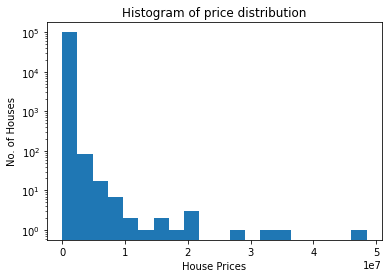

In [6]:
#histogram plot for price 
plt.hist(train['52000'],bins=20,log=True)
plt.xlabel('House Prices')
plt.ylabel('No. of Houses')
plt.title('Histogram of price distribution')
plt.show()

# Random Numbers plot and 

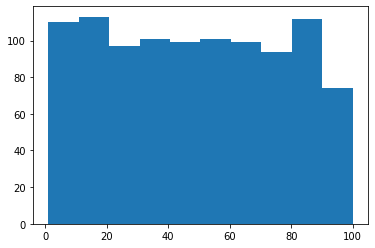

In [7]:
def rand_num_hist():
    xs = [random.randint(1, 100) for _ in range(1000)]
    plt.hist(xs)
    plt.show()
rand_num_hist() #the histogram for random number is almost uniform for all the numbers 


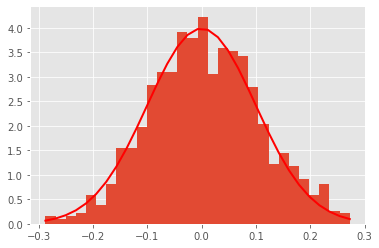

In [15]:
#gausian distribution
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

# Price inside and outside the london

In [9]:
#price inside and outside the london
## Getting prices for Houses in London and outside London
in_london = []
out_london = []

locations = train['DERBYSHIRE']
for i in range(len(locations)) :
    if 'LONDON' in locations[i]:
        in_london.append(train['52000'][i])
    else :
        out_london.append(train['52000'][i])

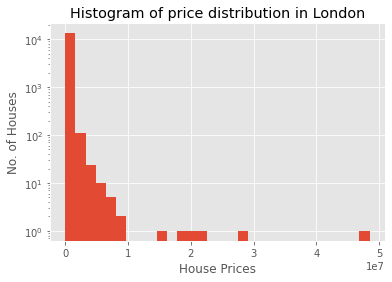

In [10]:
## Histogram of price distribution in London
plt.style.use('ggplot')
plt.hist(in_london, bins = 30, log = True)
plt.xlabel('House Prices')
plt.ylabel('No. of Houses')
plt.title('Histogram of price distribution in London')
plt.show()


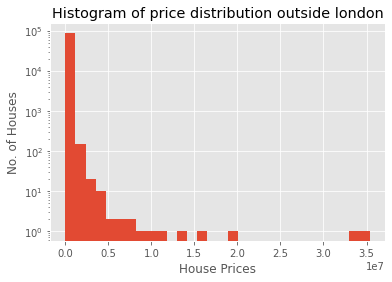

In [11]:
## Histogram of price distribution outside london
plt.hist(out_london, bins = 30, log = True)
plt.xlabel('House Prices')
plt.ylabel('No. of Houses')
plt.title('Histogram of price distribution outside london')
plt.show()

# Plot of price per year


1995 68598.00781881908
1996 73166.26066666667
1997 77312.5258340114
1998 86292.72408906883
1999 95750.0684200846
2000 108670.09838895281
2001 118469.0918814659
2002 138073.43356418103
2003 153495.8707952389
2004 179574.2139294927
2005 196889.11458333334
2006 203369.58488647916
2007 217002.66481706258
2008 214767.53302961276
2009 213933.69204271442
2010 231462.19457735246
2011 237038.55021124473
2012 237101.6747311828
2013 270223.8266561927
2014 286850.15910614526
2015 304840.865747944
2016 290684.3399339934


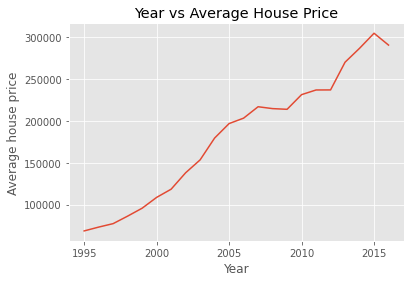

In [13]:
## Plot of price per year
times = train.iloc[:, 2]
prices=train.iloc[:,1]
years = {}
for i in range(len(times)):
    year = int(times[i][0 : 4])
    if year in years.keys() :
        years[year][0] += prices[i]
        years[year][1] += 1
    else:
        Sum = prices[i]
        Count = 1
        years[year] = [Sum, Count]
        

year_list = []
avg_price = []

for key in sorted(years) :
    print(key, years[key][0] / years[key][1])
    year_list.append(key)
    avg_price.append(years[key][0] // years[key][1])
    
plt.plot(year_list, avg_price)
plt.xlabel('Year')
plt.ylabel('Average house price')
plt.title('Year vs Average House Price')
plt.show()

# Probablistic model Section 3 A

In [16]:
def success(p_sucess):
  return np.random.rand() < p_sucess

In [18]:
s = 0;
t = 1000;
for i in range(t):
  if(success(0.3)):
    s += 1
print(s / t)

0.332


In [19]:
def exam_score(p_correct, n_instances):
  correct = 0;
  for _ in range(n_instances):
    correct += success(p_correct)
  return correct

In [20]:
no_of_correct_answers = []
for _ in range(100000):
  no_of_correct_answers.append(exam_score(0.8, 20))

Text(0, 0.5, 'frequency')

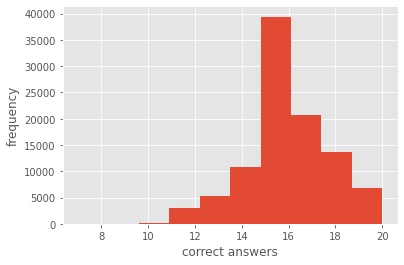

In [21]:
plt.hist(no_of_correct_answers)
plt.xlabel('correct answers')
plt.ylabel('frequency')

# Section 3B

In [22]:
def number_of_attempts(p_pass):
  count = 1;
  while(not success(p_pass)):
    count += 1
  return count 

Text(0, 0.5, 'frequency')

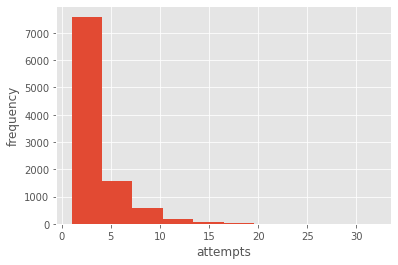

In [23]:
no_of_attempts = []
for _ in range(10000):
  no_of_attempts.append(number_of_attempts(0.3))
plt.hist(no_of_attempts)
plt.xlabel('attempts')
plt.ylabel('frequency')

# Section 3C

In [24]:
def generate():
  count_of_males = 0
  count_of_females = 0
  gender = []
  for _ in range(50):
    gender.append(success(0.4))
    if(gender[-1]):
      count_of_males += 1
    else:
      count_of_females += 1
  return count_of_males, count_of_females,  gender

In [25]:
def generate_data(mean, standard_deviation):
  return np.random.normal(mean, standard_deviation)

In [26]:
c_males, c_females, gender = generate();
height = []
weight = []
height_males = []
weight_males = []
height_females = []
weight_females = []

for x in gender:
  if(x == True):
    height.append(generate_data(140, 15))
    weight.append(generate_data(90, 10))
    height_males.append(height[-1])
    weight_males.append(weight[-1])
  else:
    height.append(generate_data(195, 10))
    weight.append(generate_data(60, 5))
    height_females.append(height[-1])
    weight_females.append(weight[-1])

Text(0.5, 1.0, 'Height-weight graph with gender variation')

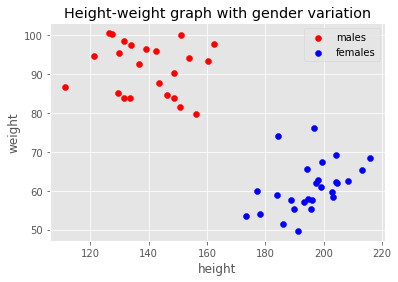

In [27]:
plt.scatter(height_males, weight_males, color = 'red', label = 'males')
plt.scatter(height_females, weight_females, color='blue', label = 'females')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.title('Height-weight graph with gender variation')